14.916737663825694
0.11820070300889103


(array([3445., 4071., 2536., 1333.,  655.,  318.,  105.,  139.,   31.,
           7.]),
 array([-0.92737994, -0.71727456, -0.50716918, -0.2970638 , -0.08695842,
         0.12314696,  0.33325234,  0.54335771,  0.75346309,  0.96356847,
         1.17367385]),
 <BarContainer object of 10 artists>)

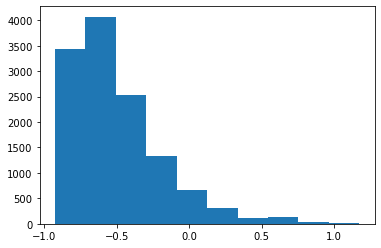

In [32]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import pandas as pd
import glob
import math
import time
import subprocess
import os
from IPython.display import clear_output


def get_cube_avg(dir_):
    '''
    Reads cube_avg.txt from the "HiDensity" directory.
    The file has specific column names, bins by velocity, directional fluxes (+x, -x, +y, -y, +z, -z)
    , and additional labels like "Earth", "Sun", "rot (x)", etc.
    Skips the first 9 rows and loads the data into a pandas DataFrame.
    Returns: A DataFrame containing cube average data.
    '''
    cube_avg_file = dir_+"/HiDensity/cube_avg.txt"
    names = ["velocity", "+x", "-x", "+y", "-y", "+z", "-z", "Earth", "Sun", "anti-Sun", "rot (x)", "rot (y)", "rot (z)"]
    df = pd.read_csv(cube_avg_file, skiprows=9,delim_whitespace=True,names=names)
    return df

def get_density_profile(dir_):
    '''
    Reads hidensity.txt from the main directory.
    The file has three columns: "rho_min" (minimum density), "rho_max" (maximum density), and "fraction" (density-related fraction).
    Skips the first 2 rows and loads the data into a pandas DataFrame.
    Returns: A DataFrame containing the density profile.
    '''
    density_profile_file = dir_+"/hidensity.txt"
    colnames = ["rho_min", "rho_max",   "fraction"]
    df = pd.read_csv(density_profile_file, skiprows=2,names = colnames,delim_whitespace=True)
    return df


def calc_crit_diam(rho_p, vel):
    t_w = 0.48
    rho_b = 2.851
    sigma = 52
    S = 11.43
    F_2 = 1
    #rho_p = 8.9
    theta = 0
    d_c = (3.918 * F_2 *  t_w**(2/3)* S**(1/3) *(sigma/70)**(1/3))/(rho_p**(1/3) * rho_b**(1/9) * (vel*np.cos(theta))**(2/3))
    return d_c


sim_names = ["phi_2.108_theta_238.272", "phi_87.718_theta_169.557", "phi_177.524_theta_193.409"]

dir_ = "MEM3_Windows/data/"
df  = get_cube_avg(dir_ + sim_names[0])


df2 = get_density_profile(dir_ + sim_names[0])

rho_min = np.array(df2["rho_min"])/1000.0
fraction = np.array(df2["fraction"])

crit_diam = []


for rho_p in rho_min:
    for v in vel:
        crit_diam.append(calc_crit_diam(rho_p, v))
print(np.max(crit_diam))
print(np.min(crit_diam))
plt.hist(np.log10(crit_diam))